<a href="https://colab.research.google.com/github/0zaRu/Redes-Neuronales/blob/main/2_clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9OQ3RT/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete9OQ3RT/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmp7t2pazu1tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
nombre_clases = metadatos.features['label'].names

In [ ]:
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Vamos a normalizar los datos para hacer que las imagenes tengan información de cada pixel de 0 a 1, en vez de 0 a 255

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255

  return imagenes, etiquetas


#Normalizalos los datos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Utilizamos la caché para que sea más rápido, porque no hay que almacenar nada en disco
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

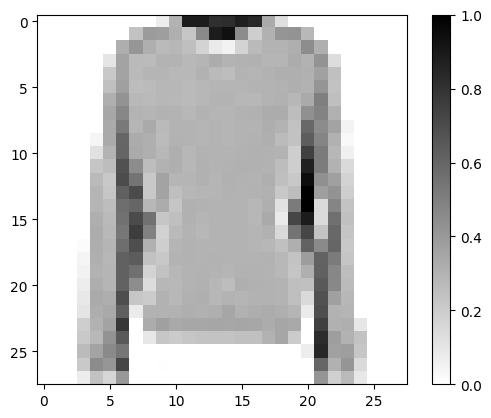

In [ ]:
#Para ver una imagen de los datos de pruebas
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt

#Para representar la imagen
plt.figure()
plt.imshow(imagen, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

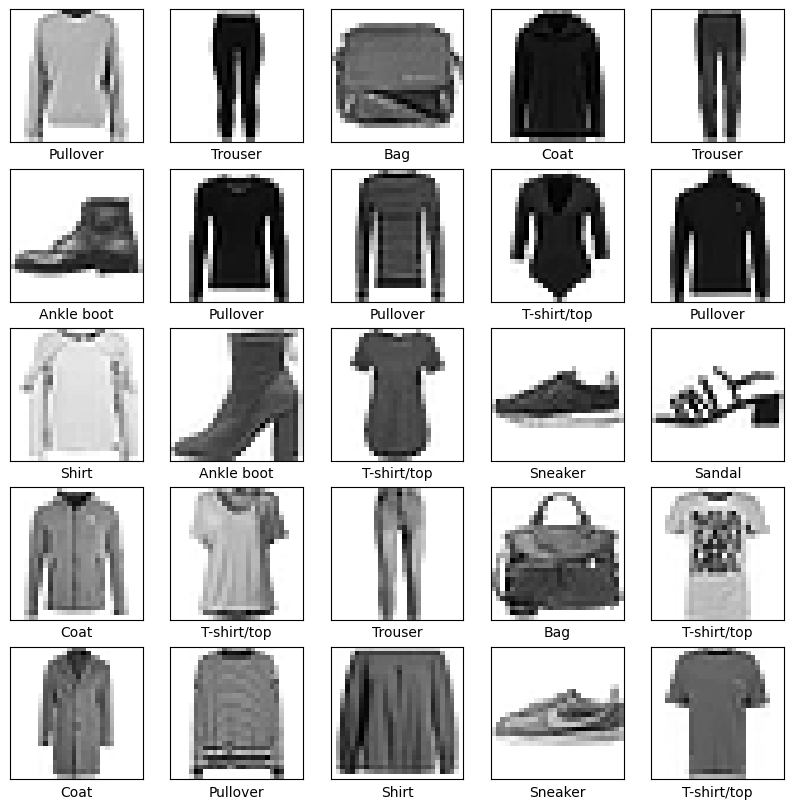

In [ ]:
plt.figure(figsize=(10, 10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombre_clases[etiqueta])
plt.show()

In [ ]:
#Creamos el modelo que luego descargaré para hacer pruebas en local

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #Con flatten, aplastamos a una sola capa de neuranas, todas las imagenes de 28x28 (de 1 solo canal, blanco y negro)
    tf.keras.layers.Dense(50, activation=tf.nn.relu), #Capas de 50 neuronas para filtrar todas las imagenes de entrada
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Capa para cribar los resultados y quedarse con el más probable de las llegadas (y normalmente el correcto)
])

In [ ]:
#Compilamos el modelo

modelo.compile(
    optimizer='adam', #Optimizador adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Método utilizado normalmente para las perdidas de sistemas de clasificación
    metrics=['accuracy']
)

In [ ]:
#Hacemos lotes de entrenamiento para que tarde menos (son 60000 imagenes jajan't)

TAMANO_LOTE=32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
#Con repeat, entrenamos varias veces, seguido de shuffle para que sea en orden diferente, seguido de batch para que sea en lotes del tamaño especificado

datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenamiento con fit(datos para entrenar, 6 vueltas, cantidad de pasos de cada vuelta (el total partido el tamaño de lotes))
historial = modelo.fit(datos_entrenamiento, epochs=6, steps_per_epoch = math.ceil(60000/TAMANO_LOTE))

Epoch 1/6
1875/1875 [==============================] - 8s 2ms/step - loss: 0.5187 - accuracy: 0.8178
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8573
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3536 - accuracy: 0.8718
Epoch 4/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3287 - accuracy: 0.8804
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3077 - accuracy: 0.8874
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8900


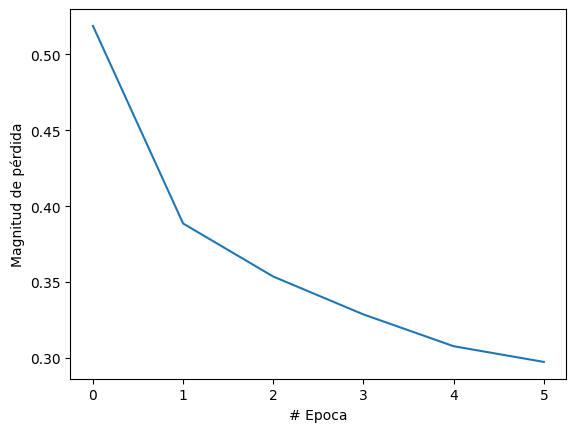

In [ ]:
#Comprobamos el historial de pérdidas
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])